In [1]:
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
filename = 'result_' + input() + '.txt'

In [8]:
# retrieve data from data.txt
raw_data = open('data.txt', 'r')
formatted_data = open(filename, 'w')

# format data into array and write to formatted_data
for line in raw_data:
    arr = line.split('\t')
    if len(arr) == 4 and 'Posted' not in arr:
        ln = arr[0] + ' | ' + arr[-1][:-1] + '\n'
        formatted_data.write(ln)
formatted_data.close()

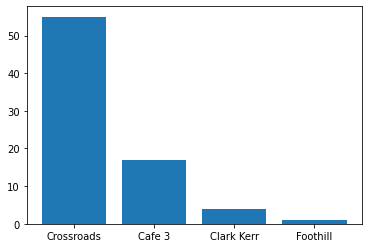

In [9]:
data = open(filename, 'r')
counts = {'Crossroads': 0, 'Cafe 3': 0, 'Clark Kerr': 0, 'Foothill': 0}

# count visits to each dininghall
for line in data:
    dininghall = line.split('|')[1][:-1]
    if 'Crossroad' in dininghall: counts['Crossroads'] += 1
    if 'Cafe' in dininghall: counts['Cafe 3'] += 1
    if 'Clark' in dininghall: counts['Clark Kerr'] += 1
    if 'Foothill' in dininghall: counts['Foothill'] += 1

data.close()

# display counts in bar chart
plt.bar(*zip(*counts.items()))
plt.show()

In [16]:
data = open(filename, 'r')
times = []

# collect times from data
for line in data:
    # times.append(line.split(" ")[1:3])
    # time = line.split(" ")[1] + ' ' + line.split(" ")[2]
    time = "0" + line.split(" | ")[0]
    print(datetime.strptime(time, '%m/%d/%y %I:%M:%S %p'))
    # print(time)

ValueError: time data '09/24/2021 6:33:32 PM' does not match format '%m/%d/%y %I:%M:%S %p'